# Andengrads data fitting

In [1]:
from IPython.display import display, Latex
from sympy import *
from sympy.plotting import plot
init_printing(use_latex='mathjax')

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# Symbols used
x, a, b, c, n = symbols('x a b c n')

# Data points
x_points = [0,1,2,3,4,5]
y_points = [0.5, 4.5, 9, 7.5, 5, 0.4]

# Model to use
model = a*x**2 + b*x + c
f = lambdify((x, a, b, c), model)

# Summed variables used in equations for a, b and c
S_x = 0
S_xx = 0
S_xxx = 0
S_xxxx = 0
S_y = 0
S_xxy = 0
S_xy = 0
n = len(x_points)

for i in range(len(x_points)):
    S_x += x_points[i]**1
    S_xx += x_points[i]**2
    S_xxx += x_points[i]**3
    S_xxxx += x_points[i]**4
    S_y += y_points[i]
    S_xy += x_points[i]*y_points[i]
    S_xxy += x_points[i]**2*y_points[i]
    

# Defining equations
eq1 = a*S_xxxx + b*S_xxx + c*S_xx - S_xxy
eq2 = a*S_xxx + b*S_xx + c * S_x - S_xy
eq3 = a*S_xx + b*S_x + n - S_y

# Solving equations
solved = solve((eq1, eq2, eq3), (a, b, c))
print(solved)

# Assigning values to symbols
a = solved[a]
b = solved[b]
c = solved[c]

# Generating points for model plot
x_list = np.linspace(-10, 10, 100)
y_list = f(x_list, a, b, c)

# Setup figure
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
fig = ax.set_xlim((-1,6))
fig = ax.set_ylim((-5,10))
# Display figure
fig = ax.scatter(x_points, y_points, color='black');
fig = ax.plot(x_list, y_list)
# plt.close() # Don't display

{a: -1.17142857142857, b: 5.68857142857143, c: 1.18000000000000}


# Summering

In [2]:
from sympy import Sum, symbols, Indexed, lambdify
import numpy as np

x, i = symbols("x i")
s = Sum(Indexed('x',i),(i,0,3))
f = lambdify(x, s)
b = np.array([1, 2, 3, 4])
f(b)

10

      3             
     ___            
     ╲              
      ╲   a⋅x[k]    
b +   ╱          - 5
     ╱              
     ‾‾‾            
    k = 0           

-10⋅a + 2⋅b

10⋅a + b - 5

-10⋅a + 2⋅b

{a: 1/3, b: 5/3}

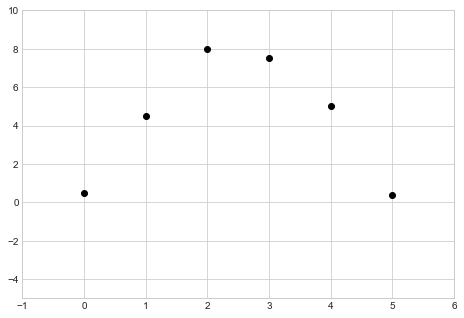

In [3]:
# Clear defined variables
%reset -f
from IPython.display import display, Latex
from sympy import *
from sympy.plotting import plot
init_printing(use_latex='mathjax')

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# Symbols used
x, y, a, b, c, n, k = symbols('x y a b c n k')

# Data points
x_points = [0,1,2,3,4,5]
y_points = [0.5, 4.5, 8, 7.5, 5, 0.4]

# Model to use
model = Sum(a*Indexed(x, k), (k,0,3))- 5 + b
model2 = 2*b - 10*a
f = lambdify((x, a, b), model)
g = lambdify((x, a, b), model2)

display(model)
display(model2)

y_list_sum = f([1,2,3,4], a, b)
y_list_sum2 = g([1,2,3,4], a, b)
display(y_list_sum)
display(y_list_sum2)
display(solve((y_list_sum, y_list_sum2), (a,b)))

"""
E = Sum((model-Indexed(y,k))**2,(k,0,len(x_points)))
display(E)

f_E = lambdify((x, a, b, c), E)
y_listE = f_E(x_points, a, b, c)

eqA = Derivative(E, a)
display(eqA)
f_A = lambdify((x, a, b, c), eqA)

eqB = Derivative(E, b)
display(eqB)
f_B = lambdify((x, a, b, c), eqB)

eqC = Derivative(E, c)
display(eqC)
f_C = lambdify((x, a, b, c), eqC)


x = x_points
display(x[1])
y = y_points

# solved = nsolve((f_A, f_B, f_C), (a, b, c), (1,1,1))
# print(solved)


# Generating points for model plot
x_list = np.linspace(-10, 10, 100)
y_list = f(x_list, a, b, c)

"""

# Setup figure
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
fig = ax.set_xlim((-1,6))
fig = ax.set_ylim((-5,10))
# Display figure
fig = ax.scatter(x_points, y_points, color='black');
#fig = ax.plot(x_list, y_list)
# plt.close() # Don't display

      4         3         2             
a⋅x[k]  + b⋅x[k]  + c⋅x[k]  + d⋅x[k] + e

  9                                                     
 ____                                                   
 ╲                                                      
  ╲                                                    2
   ╲  ⎛      4         3         2                    ⎞ 
   ╱  ⎝a⋅x[k]  + b⋅x[k]  + c⋅x[k]  + d⋅x[k] + e - y[k]⎠ 
  ╱                                                     
 ╱                                                      
 ‾‾‾‾                                                   
k = 0                                                   

  9                                                            
 ___                                                           
 ╲                                                             
  ╲     ⎛      4         3         2                    ⎞     4
  ╱   2⋅⎝a⋅x[k]  + b⋅x[k]  + c⋅x[k]  + d⋅x[k] + e - y[k]⎠⋅x[k] 
 ╱                                                             
 ‾‾‾                                                           
k = 0                                                          

135462666⋅a + 16160850⋅b + 1956810⋅c + 241650⋅d + 30666⋅e - 25914.8

  9                                                            
 ___                                                           
 ╲                                                             
  ╲     ⎛      4         3         2                    ⎞     3
  ╱   2⋅⎝a⋅x[k]  + b⋅x[k]  + c⋅x[k]  + d⋅x[k] + e - y[k]⎠⋅x[k] 
 ╱                                                             
 ‾‾‾                                                           
k = 0                                                          

16160850⋅a + 1956810⋅b + 241650⋅c + 30666⋅d + 4050⋅e - 2196.0

  9                                                            
 ___                                                           
 ╲                                                             
  ╲     ⎛      4         3         2                    ⎞     2
  ╱   2⋅⎝a⋅x[k]  + b⋅x[k]  + c⋅x[k]  + d⋅x[k] + e - y[k]⎠⋅x[k] 
 ╱                                                             
 ‾‾‾                                                           
k = 0                                                          

1956810⋅a + 241650⋅b + 30666⋅c + 4050⋅d + 570⋅e - 93.2

  9                                                           
 ___                                                          
 ╲                                                            
  ╲     ⎛      4         3         2                    ⎞     
  ╱   2⋅⎝a⋅x[k]  + b⋅x[k]  + c⋅x[k]  + d⋅x[k] + e - y[k]⎠⋅x[k]
 ╱                                                            
 ‾‾‾                                                          
k = 0                                                         

241650⋅a + 30666⋅b + 4050⋅c + 570⋅d + 90⋅e + 18.0

  9                                                                
 ___                                                               
 ╲                                                                 
  ╲   ⎛        4           3           2                          ⎞
  ╱   ⎝2⋅a⋅x[k]  + 2⋅b⋅x[k]  + 2⋅c⋅x[k]  + 2⋅d⋅x[k] + 2⋅e - 2⋅y[k]⎠
 ╱                                                                 
 ‾‾‾                                                               
k = 0                                                              

30666⋅a + 4050⋅b + 570⋅c + 90⋅d + 20⋅e + 1.2

{a: -0.0307109557109557, b: 0.575174825174825, c: -3.17587412587413, d: 4.43094405594406, e: 1.12937062937063}


                      4                      3                     2          
- 0.0307109557109557⋅x  + 0.575174825174825⋅x  - 3.17587412587413⋅x  + 4.43094

                              
405594406⋅x + 1.12937062937063

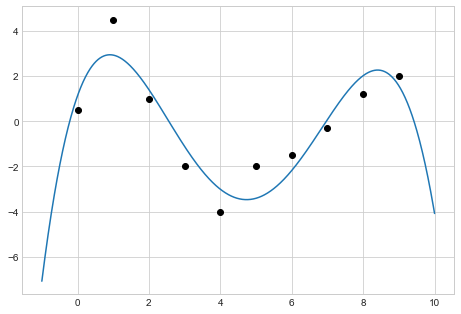

In [4]:
# Clear defined variables
%reset -f

# Clear defined variables
from IPython.display import display, Latex
from sympy import *
from sympy.plotting import plot
init_printing(use_latex='mathjax')

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# Symbols used
x, y, a, b, c, d, e, n, k = symbols('x y a b c d e n k')

# Data points
x_points = [0,1, 2, 3, 4,5,6,7,8,9]
y_points = [0.5, 4.5, 1, -2, -4, -2, -1.5, -0.3, 1.2, 2.0]

# Model to use
model = a*Indexed(x, k)**4 + b*Indexed(x, k)**3 + c*Indexed(x, k)**2 + d*Indexed(x, k) + e


f = lambdify((x, a, b, c, d, e), model)
display(model)

E = Sum((model-Indexed(y,k))**2,(k,0,len(x_points) -1))
f_E = lambdify((x, y, a, b, c, d, e), E)
display(E)

eqA = E.diff(a)
display(eqA)
f_A = lambdify((x, y, a, b, c, d, e), eqA)
list_y_A = f_A(x_points, y_points, a, b, c, d, e)
display(list_y_A)

eqB = E.diff(b)
display(eqB)
f_B = lambdify((x, y, a, b, c, d, e), eqB)
list_y_B = f_B(x_points, y_points, a, b, c, d, e)
display(list_y_B)

eqC = E.diff(c)
display(eqC)
f_C = lambdify((x, y, a, b, c, d, e), eqC)
list_y_C = f_C(x_points, y_points, a, b, c, d, e)
display(list_y_C)

eqD = E.diff(d)
display(eqD)
f_D = lambdify((x, y, a, b, c, d, e), eqD)
list_y_D = f_D(x_points, y_points, a, b, c, d, e)
display(list_y_D)

eqE = E.diff(e)
display(eqE)
f_E = lambdify((x, y, a, b, c, d, e), eqE)
list_y_E = f_E(x_points, y_points, a, b, c, d, e)
display(list_y_E)

# Solving equations
solved = solve((list_y_A, list_y_B, list_y_C, list_y_D, list_y_E), (a, b, c, d, e))
print(solved)

# Assigning values to symbols
a = solved[a]
b = solved[b]
c = solved[c]
d = solved[d]
e = solved[e]

# Generating points for model plot
x_list = np.linspace(-1, 10, 1000)
unindexed_model = a*x**4 + b*x**3 + c*x**2 + d*x**1 + e*x**0
y_generator = lambdify((x), unindexed_model)

display(unindexed_model)
y_list = y_generator(x_list)

# Setup figure
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
# fig = ax.set_xlim((-1,6))
# fig = ax.set_ylim((-5,10))
# Display figure
fig = ax.scatter(x_points, y_points, color='black');
fig = ax.plot(x_list, y_list)
# plt.close() # Don't display
plt.show()

# General


Model to fit:


sin(x[k])⋅v[1] + cos(x[k])⋅v[2]

Equation to minimize:


  9                                            
 ___                                           
 ╲                                             
  ╲                                           2
  ╱   (sin(x[k])⋅v[1] + cos(x[k])⋅v[2] - y[k]) 
 ╱                                             
 ‾‾‾                                           
k = 0                                          

Free variables to solve for:


[v[1], v[2]]

Solving for: 


v[1]

  9                                                       
 ___                                                      
 ╲                                                        
  ╲   2⋅(sin(x[k])⋅v[1] + cos(x[k])⋅v[2] - y[k])⋅sin(x[k])
  ╱                                                       
 ╱                                                        
 ‾‾‾                                                      
k = 0                                                     

9.41094332878443⋅v[1] - 0.266439556689467⋅v[2] - 21.2666104647013

Solving for: 


v[2]

  9                                                       
 ___                                                      
 ╲                                                        
  ╲   2⋅(sin(x[k])⋅v[1] + cos(x[k])⋅v[2] - y[k])⋅cos(x[k])
  ╱                                                       
 ╱                                                        
 ‾‾‾                                                      
k = 0                                                     

-0.266439556689467⋅v[1] + 10.5890566712156⋅v[2] - 6.32564832086674

solved_eqs:


[9.41094332878443⋅v[1] - 0.266439556689467⋅v[2] - 21.2666104647013, -0.2664395
56689467⋅v[1] + 10.5890566712156⋅v[2] - 6.32564832086674]

{v[1]: 2.27831029472824, v[2]: 0.654702351781759}

2.27831029472824⋅sin(x) + 0.654702351781759⋅cos(x)

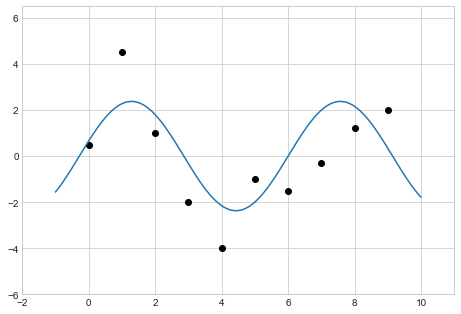

In [5]:
# Clear defined variables
%reset -f
# Clear defined variables
from IPython.display import display, Latex, Markdown
import sympy as sym
from sympy.plotting import plot
sym.init_printing(use_latex='mathjax')
import math as Math
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np

# Symbols used
j, k, n, v, x, y = sym.symbols('j k n v x y')

# Data points
x_points = [0,1, 2, 3, 4,5,6,7,8,9]
y_points = [0.5, 4.5, 1, -2, -4, -1, -1.5, -0.3, 1.2, 2.0]

# Model to use
num_free_vars = 2
model = sym.Indexed(v, 1) * sym.sin(sym.Indexed(x, k)) + sym.Indexed(v,2) * sym.cos(sym.Indexed(x, k))
# model = Indexed(v, 5)*Indexed(x, k)**4 + Indexed(v, 4)*Indexed(x, k)**3 + Indexed(v, 3)*Indexed(x, k)**2 + Indexed(v, 2)*Indexed(x, k)**1 + Indexed(v, 1)*Indexed(x, k)**0
print("Model to fit:")
display(model)

# To be minimized
E = sym.Sum((model-sym.Indexed(y,k))**2,(k,0,len(x_points) -1))
print("Equation to minimize:")
display(E)

# List of variables to solve for
free_variables = [sym.Indexed(v, n) for n in range(1, num_free_vars + 1)]
print("Free variables to solve for:")
display(free_variables)

solved_eqs = []
for var_num in range(1, num_free_vars + 1):    
    print("Solving for: ")
    display(sym.Indexed(v, var_num))
    eq = E.diff(sym.Indexed(v, var_num))
    display(eq)
    f = sym.lambdify((x, y, *free_variables), eq)
    solved_eq = f(x_points, y_points, *free_variables)
    display(solved_eq)
    solved_eqs.append(solved_eq)

print("solved_eqs:")
display(solved_eqs)

# Solve n equations with n unknowns
solved = sym.solve((solved_eqs), (free_variables))
display(solved)
    
# Create list of evenly distibuted x-points
x_list = np.linspace(np.min(x_points) - 1, np.max(x_points) + 1, 10000)

unindexed_model = solved[sym.Indexed(v, 1)] * sym.sin(x) + solved[sym.Indexed(v,2)] * sym.cos(x)
# unindexed_model = solved[Indexed(v, 5)]*x**4 + solved[Indexed(v, 4)]*x**3 + solved[Indexed(v, 3)]*x**2 + solved[Indexed(v, 2)]*x**1 + solved[Indexed(v, 1)]*x**0
display(unindexed_model)

# Generate y-coords for each x-coord
y_generator = sym.lambdify((x), unindexed_model)
y_list = y_generator(x_list)

# Setup figure
fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
fig = ax.set_xlim((np.min(x_points) - 2, np.max(x_points) + 2))
fig = ax.set_ylim((np.min(y_points) - 2, np.max(y_points) + 2))
# Display figure
fig = ax.scatter(x_points, y_points, color='black');
fig = ax.plot(x_list, y_list)
# plt.close() # Don't display
# plt.show()

Before load
[[7.28097000e-04 3.35607949e-04]
 [3.06628100e-03 5.23935598e-04]
 [4.20771300e-03 2.64951743e-04]
 ...
 [4.15633823e+00 4.71341183e-04]
 [4.15721265e+00 2.64666683e-04]
 [4.15976329e+00 3.78546144e-04]]


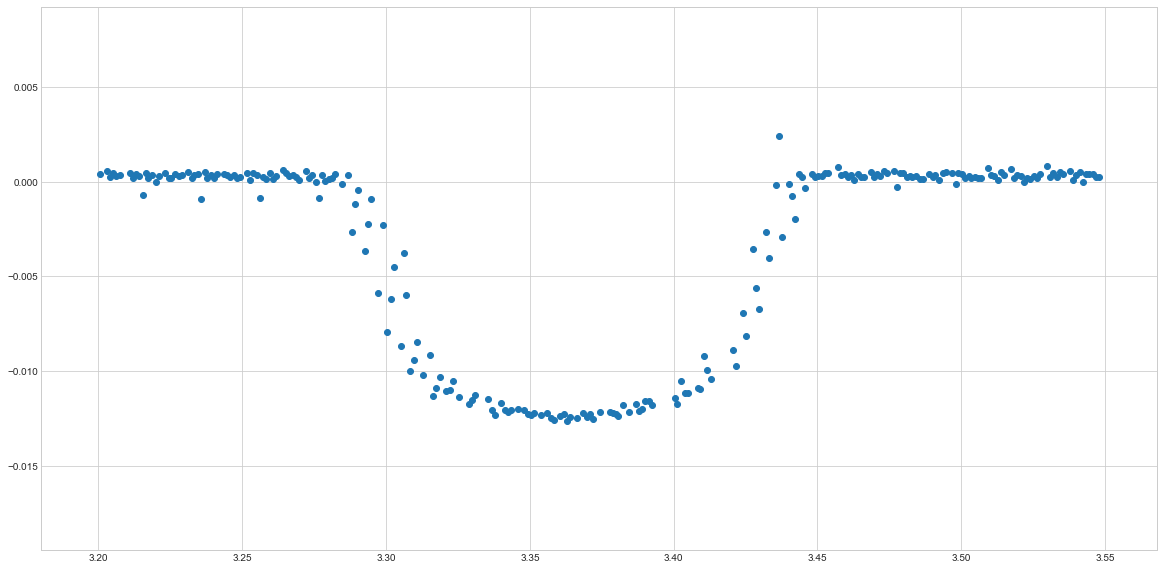

          11             10             9             8             7         
v[10]⋅x[k]   + v[11]⋅x[k]   + v[12]⋅x[k]  + v[13]⋅x[k]  + v[14]⋅x[k]  + v[15]⋅

    6             5             4             3             2            20   
x[k]  + v[16]⋅x[k]  + v[17]⋅x[k]  + v[18]⋅x[k]  + v[19]⋅x[k]  + v[1]⋅x[k]   + 

                              19            18            17            16    
v[20]⋅x[k] + v[21] + v[2]⋅x[k]   + v[3]⋅x[k]   + v[4]⋅x[k]   + v[5]⋅x[k]   + v

        15            14            13            12
[6]⋅x[k]   + v[7]⋅x[k]   + v[8]⋅x[k]   + v[9]⋅x[k]  

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21


'Solving...'

'Solved'

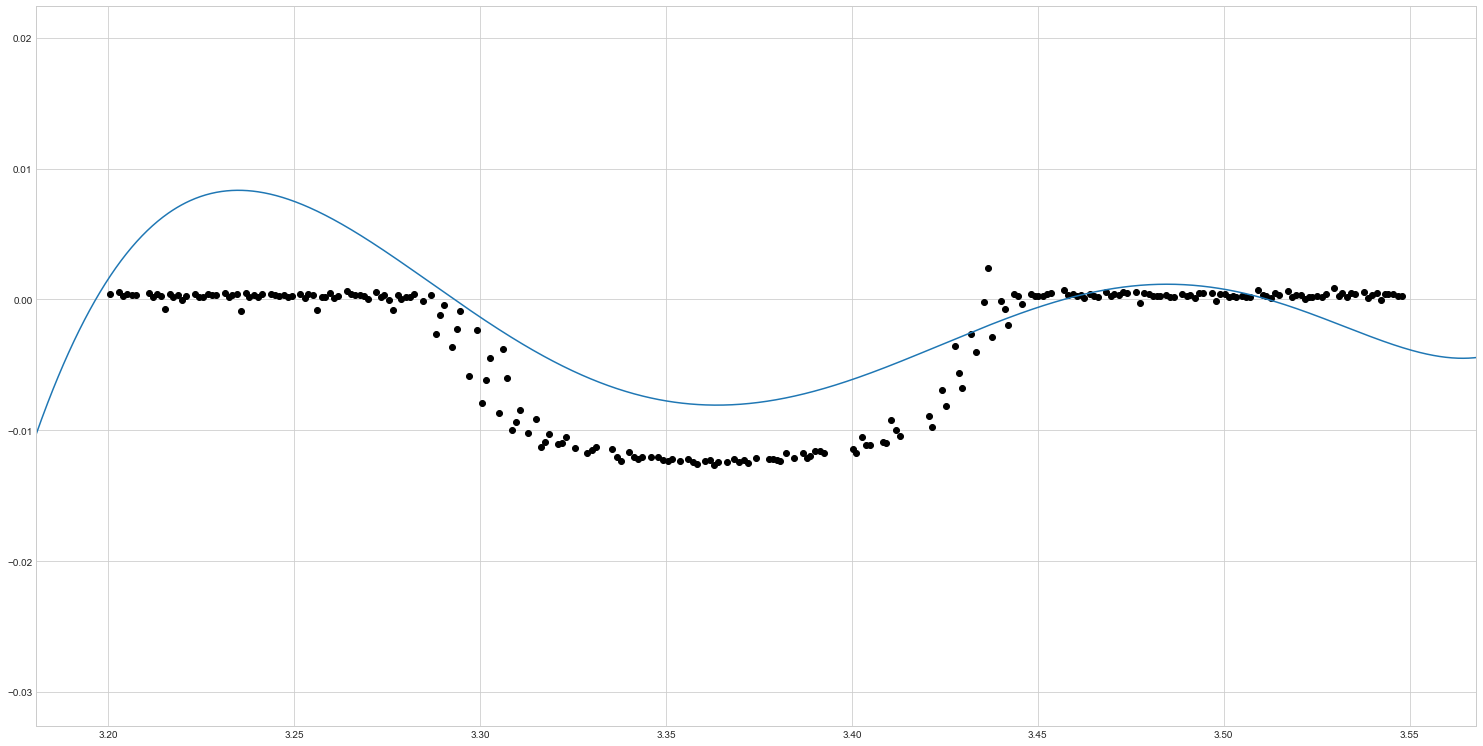

0.004380644390984812

          12             11             10             9             8        
v[10]⋅x[k]   + v[11]⋅x[k]   + v[12]⋅x[k]   + v[13]⋅x[k]  + v[14]⋅x[k]  + v[15]

     7             6             5             4             3            21  
⋅x[k]  + v[16]⋅x[k]  + v[17]⋅x[k]  + v[18]⋅x[k]  + v[19]⋅x[k]  + v[1]⋅x[k]   +

           2                                 20            19            18   
 v[20]⋅x[k]  + v[21]⋅x[k] + v[22] + v[2]⋅x[k]   + v[3]⋅x[k]   + v[4]⋅x[k]   + 

         17            16            15            14            13
v[5]⋅x[k]   + v[6]⋅x[k]   + v[7]⋅x[k]   + v[8]⋅x[k]   + v[9]⋅x[k]  

1
2
3
4
5
6
7
8
9
10


KeyboardInterrupt: 

In [6]:
# Clear defined variables
%reset -f
# %matplotlib tk
# Clear defined variables
from IPython.display import display, Latex, Markdown
import sympy as sym
from sympy.plotting import plot
import math as Math
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import numpy as np
import random
import re

sym.init_printing(use_latex='mathjax')

plt.rcParams["figure.figsize"] = (20, 10)
# Symbols used
j, k, n, v, x, y, a = sym.symbols('j k n v x y a')

should_display = {"all": False, "math": False, "debug": False, "text": False, "diagram": True, "R2": True, "status": True}
def to_display(to_display, display_type):
    if should_display["all"]:
        display(to_display)
    elif should_display["math"] and display_type == "math":
        display(to_display)
    elif should_display["debug"] and display_type == "debug":
        display(to_display)
    elif should_display["text"] and display_type == "text":
        display(to_display)
    elif should_display["R2"] and display_type == "R2":
        display(to_display)
    elif should_display["status"] and display_type == "status":
        display(to_display)
        
def calc_R2(model, x_points, y_points):    
    # model.replace("x", "sym.Indexed(x, k)")
    model = model.subs(x, sym.Indexed(x, k))
    # display(1/len(x_points))
    R2_model = sym.sqrt(1/len(x_points)*sym.Sum(((model) - sym.Indexed(y, k))**2,(k,0,len(x_points) -1)))
    # display(R2_model)
    f_R2 = sym.lambdify((x, y), R2_model)
    return f_R2(x_points, y_points)
        

def fit_model(str_model, x_points, y_points):
    still_searching = True
    model = str_model.replace('x', 'sym.Indexed(x, k)')
    free_vars = []
    free_vars_indices = []
    while still_searching:
        match = re.search(r"v_\d+", model)
        if not match:
            still_searching = False
            continue
        matching_text = match.group()
        var_num = re.search(r"\d+", matching_text).group()
        model = model[:match.span()[0]] + "sym.Indexed(v," + str(var_num) + ")" + model[match.span()[1]:]
        free_vars.append(eval("sym.Indexed(v," + str(var_num) + ")"))
        free_vars_indices.append(int(var_num))
    # print(model)

    model = eval(model)
    # Symbols used
    j, k, n, v, x, y, a = sym.symbols('j k n v x y, a')

    # Model to use
    num_free_vars = len(free_vars)
    # model = sym.Indexed(v, 1) * sym.sin(sym.Indexed(x, k)) + sym.Indexed(v,2) * sym.cos(sym.Indexed(x, k))
    # model = Indexed(v, 5)*Indexed(x, k)**4 + Indexed(v, 4)*Indexed(x, k)**3 + Indexed(v, 3)*Indexed(x, k)**2 + Indexed(v, 2)*Indexed(x, k)**1 + Indexed(v, 1)*Indexed(x, k)**0
    to_display("Model to fit:", "text")
    to_display(model, "status")

    # To be minimized
    E = sym.Sum((model-sym.Indexed(y,k))**2,(k,0,len(x_points) -1))
    to_display("Equation to minimize:", "text")
    to_display(E, "math")

    # List of variables to solve for
    to_display("Free variables to solve for:", "text")
    to_display(free_vars, "math")

    solved_eqs = []
    to_display("Starting now", "debug")
    for var_num in free_vars_indices:    
        print(var_num)
        to_display(sym.Indexed(v, var_num), "debug")
        to_display("Solving for: ", "text")
        to_display(sym.Indexed(v, var_num), "math")
        eq = E.diff(sym.Indexed(v, var_num))
        to_display(eq, "math")
        f = sym.lambdify((x, y, *free_vars), eq)
        solved_eq = f(x_points, y_points, *free_vars)
        to_display(solved_eq, "math")
        solved_eqs.append(solved_eq)
        
    to_display("Solving...", "status")
    # Solve n equations with n unknowns
    solved = sym.solve((solved_eqs), (free_vars), simplify=False, rational=False)
    to_display("Solved", "status")
    # Create list of evenly distibuted x-points
    x_list = np.linspace(np.min(x_points) - 1, np.max(x_points) + 1, 10000)
    # solved_model = solved[sym.Indexed(v, 1)] * sym.sin(x) + solved[sym.Indexed(v,2)] * sym.cos(x)
    still_searching = True
    solved_model = str_model
    while still_searching:
        match = re.search(r"v_\d+", solved_model)
        if not match:
            still_searching = False
            continue
        matching_text = match.group()
        var_num = pattern = r"\d+"
        var_num = re.search(r"\d+", matching_text).group()
        if not sym.Indexed(v, var_num) in solved:
            print("excluding {}".format(var_num))
            solved_model = solved_model[:match.span()[0]] + "0" + solved_model[match.span()[1]:]
            continue
        solved_model = solved_model[:match.span()[0]] + "solved[sym.Indexed(v," + str(var_num) + ")]" + solved_model[match.span()[1]:]

    solved_model_eval = eval(solved_model)
    to_display("Solved model evaluated:", "text")
    to_display(solved_model_eval, "math")
    # Generate y-coords for each x-coord
    y_generator = sym.lambdify((x), solved_model_eval)
    y_list = y_generator(x_list)

    # Setup figure
    fig=plt.figure()
    ax=fig.add_axes([0,0,1,1])
    fig = ax.set_xlim((np.min(x_points) - 0.02, np.max(x_points) + 0.02))
    fig = ax.set_ylim((np.min(y_points) - 0.02, np.max(y_points) + 0.02))
    # Display figure
    fig = ax.scatter(x_points, y_points, color='black');
    fig = ax.plot(x_list, y_list)
    if not should_display["diagram"]:
        plt.close() # Don't display
    plt.show()
    # R^2
    to_display("R_2:", "debug")
    to_display(calc_R2(solved_model_eval, x_points, y_points), "R2")
    
    
    
def n_degree_poly(n):
    model = ""
    for i in range(1, n+2):
        model += "+v_" + str(i) + "*x**" + str(n+1-i)
    return model

# Data points
# x_points = [0,1, 2, 3, 4,5,6,7,8,9, 10, 11]
# y_points = [0.5, 4.5, 1, -2, -4, -1, -1.5, -0.3, 1.2, 2.0, 3.4, 5]
x_points = np.linspace(1, 10, 10)
y_points = []
for i in range(0, len(x_points - 1)):
    if i == 0:
        y_points.append(random.random() * 20 - 10)
        continue
    y_points.append(y_points[i-1] + (random.random() * 20) - 10)

# for i in range(0, len(x_points)):    
#     x_points = np.append(x_points, x_points[i])
#     y_points = np.append(y_points, y_points[i])
    

# Load data from csv
x_points = []
y_points = []
print("Before load")
arr = np.genfromtxt('folded_data.csv', delimiter=',')
for i in range(len(arr)):
    point = arr[i]
    if point[0] > 3.2 and point[0] < 3.55:
        if i > 0:
            variance = 0.0060
            if point[1] < arr[i-1][1] + variance and point[1] > arr[i-1][1] - variance:
                x_points.append(point[0])
                y_points.append(point[1])
        else:
            x_points.append(point[0])
            y_points.append(point[1])

print(arr)
plt.scatter(x_points, y_points)
plt.show()
# Model
#n = len(x_points)-1
n = 14
#model = n_degree_poly(n)
for i in range(20, 25):
    fit_model(n_degree_poly(i), x_points, y_points)
# fit_model(n_degree_poly(10), x_points, y_points)

#fit_model(n_degree_poly(n), x_points, y_points)
#model = "x*v_1*sym.sin(x+1+a) + x*v_2*sym.sin(x)"
#fit_model(model, x_points, y_points)